In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [11]:
data = datasets.load_wine(as_frame=True)
data

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [12]:
# data has the feature part and target has the target(label) part
X = data.data
y = data.target
names = data.target_names
names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [22]:
df = pd.DataFrame(X, columns=data.feature_names)
df['Wine Class'] = y
df['Wine Class'] = df['Wine Class'].replace(to_replace=[0,1,2], value=['class_0', 'class_1', 'class_2'])
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline Wine Class  
0                            3.92   1065.0    class_0  
1                            3.40   1050.0    class_0  
2                            3.17   1185.0    class_0  
3                            3.45   1480.0    class_0  
4                            2.93    735.0    class_0  
..                            ...      ...        ...  
173                          1.74    740.0    class_2  
174                          1.56    750.0    class_2  
175                          1.56    835.0    class_2  
176                          1.62    840.0    class_2  
177                          1.60    560.0    class_2  

[178 rows x 14 columns]

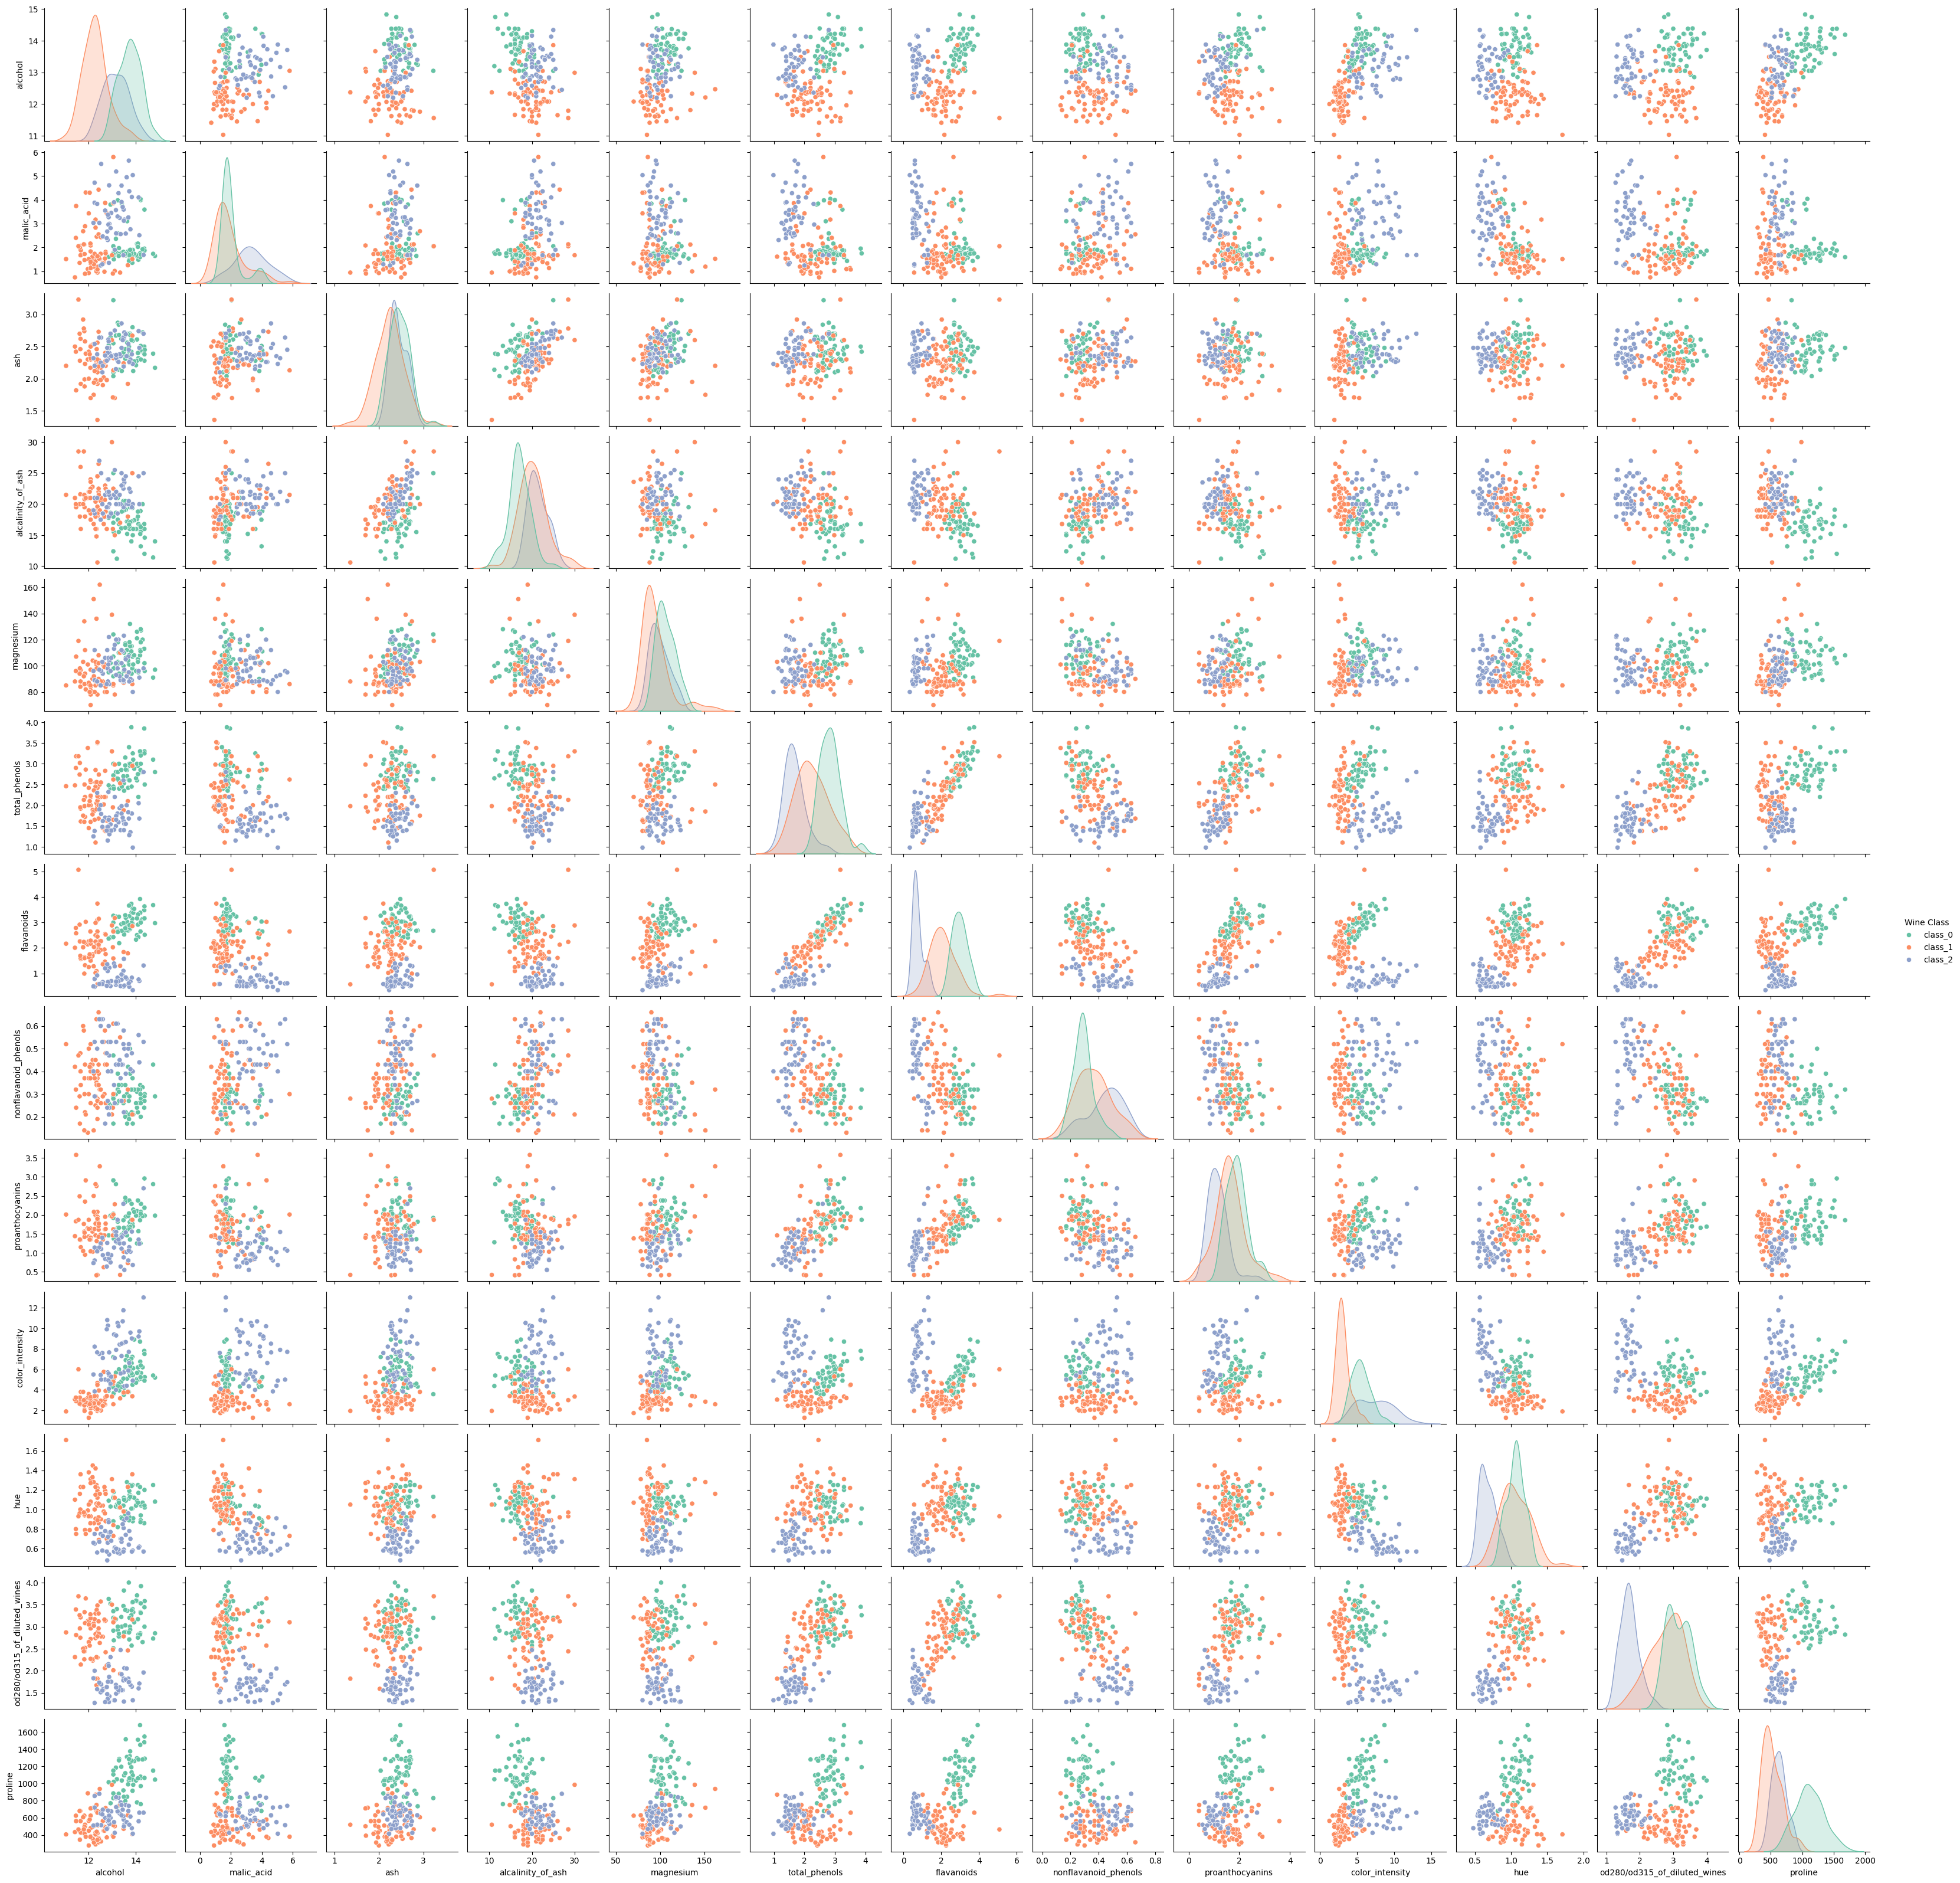

In [23]:
# visualize distribution of data
sns.pairplot(data=df, hue='Wine Class',palette='Set2')

In [24]:
# check if there is null value
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Wine Class                      0
dtype: int64

In [25]:
# split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
import math
math.sqrt(len(y_test))

7.3484692283495345

In [47]:
# create knn model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X,y)
pred = knn.predict(X_test)

In [48]:
# visualize accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, pred)

0.7037037037037037

In [50]:
# accuracy is pretty less and this is because features have varying values
# we cane scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
knn1 = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn1.fit(X_train, y_train)
pred1 = knn1.predict(X_test)

In [53]:
metrics.accuracy_score(y_test, pred1)

0.9814814814814815